# Xente Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('max_colwidth', 1000)
pd.set_option('display.max_columns', 40)
description = pd.read_csv('Xente_Variable_Definitions.csv', encoding='utf-8')
description

,Column Name,Definition
0,TransactionId,Unique �transaction identifier on platform
1,BatchId,Unique number assigned to a batch of transactions for processing
2,AccountId,Unique number identifying the customer on platform
3,SubscriptionId,Unique number identifying the customer subscription
4,CustomerId,Unique identifier attached to Account
5,CurrencyCode,Country currency
6,CountryCode,Numerical geographical code of country
7,ProviderId,Source provider of Item �bought.
8,ProductId,Item name being bought.
9,ProductCategory,ProductIds are organized into these broader product categories.


In [3]:
df = pd.read_csv('training.csv')
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13T09:54:09Z,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13T09:54:25Z,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13T09:54:35Z,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,UGX,256,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13T10:01:10Z,2,0


## Data Cleaning & Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

There's no missing data

In [5]:
def uniqueInCol(dataframe):
    dfNunique = []
    for col in dataframe.columns:
        dfNunique.append(dataframe[col].nunique())
    return pd.DataFrame(dfNunique, columns=['nunique'], index=dataframe.columns)

uniqueInCol(df)

,nunique
TransactionId,95662
BatchId,94809
AccountId,3633
SubscriptionId,3627
CustomerId,3742
CurrencyCode,1
CountryCode,1
ProviderId,6
ProductId,23
ProductCategory,9


In [6]:
df.drop(['CurrencyCode', 'CountryCode'], axis=1, inplace=True)

In [7]:
df.TransactionStartTime = df.TransactionStartTime.apply(lambda x : ' '.join(x[:-1].split('T')))
df.TransactionStartTime = pd.to_datetime(df.TransactionStartTime)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   TransactionId         95662 non-null  object        
 1   BatchId               95662 non-null  object        
 2   AccountId             95662 non-null  object        
 3   SubscriptionId        95662 non-null  object        
 4   CustomerId            95662 non-null  object        
 5   ProviderId            95662 non-null  object        
 6   ProductId             95662 non-null  object        
 7   ProductCategory       95662 non-null  object        
 8   ChannelId             95662 non-null  object        
 9   Amount                95662 non-null  float64       
 10  Value                 95662 non-null  int64         
 11  TransactionStartTime  95662 non-null  datetime64[ns]
 12  PricingStrategy       95662 non-null  int64         
 13  FraudResult     

In [9]:
df

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09,2,0
95658,TransactionId_91597,BatchId_3503,AccountId_3439,SubscriptionId_2643,CustomerId_3874,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2019-02-13 09:54:25,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35,2,0
95660,TransactionId_136354,BatchId_70924,AccountId_1346,SubscriptionId_652,CustomerId_1709,ProviderId_6,ProductId_19,tv,ChannelId_3,3000.0,3000,2019-02-13 10:01:10,2,0


## Exploratory Data Analysis

In [10]:
# Extremely imbalace data
df.FraudResult.value_counts()

0    95469
1      193
Name: FraudResult, dtype: int64

In [11]:
# Let's inspect some information from AccountId
df[df.AccountId == 'AccountId_4841']

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21,2,0
7,TransactionId_100640,BatchId_38561,AccountId_4841,SubscriptionId_3829,CustomerId_2858,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-500.0,500,2018-11-15 03:45:13,2,0
11,TransactionId_33857,BatchId_126394,AccountId_4841,SubscriptionId_3829,CustomerId_3052,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-40.0,40,2018-11-15 04:32:42,2,0
18,TransactionId_64044,BatchId_117733,AccountId_4841,SubscriptionId_3829,CustomerId_3105,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-10.0,10,2018-11-15 04:54:18,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95653,TransactionId_68851,BatchId_100900,AccountId_4841,SubscriptionId_3829,CustomerId_539,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-140.0,140,2019-02-13 09:50:34,2,0
95655,TransactionId_38907,BatchId_92168,AccountId_4841,SubscriptionId_3829,CustomerId_960,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-50.0,50,2019-02-13 09:52:49,2,0
95657,TransactionId_89881,BatchId_96668,AccountId_4841,SubscriptionId_3829,CustomerId_3078,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1000.0,1000,2019-02-13 09:54:09,2,0
95659,TransactionId_82501,BatchId_118602,AccountId_4841,SubscriptionId_3829,CustomerId_3874,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2019-02-13 09:54:35,2,0


In [12]:
# Some AccountId is attached to several CustomerId
df[df.AccountId == 'AccountId_4841'].CustomerId.nunique()

2577

In [13]:
df[(df.AccountId == 'AccountId_4841') & (df.FraudResult == 1) ]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
68918,TransactionId_71725,BatchId_62457,AccountId_4841,SubscriptionId_3829,CustomerId_865,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1005.0,1005,2019-01-23 09:15:37,2,1


In [14]:
# Let's look at the fraudulent transaction
df[df.FraudResult == 1].sort_values(by=['Value'])

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
68888,TransactionId_11592,BatchId_62469,AccountId_530,SubscriptionId_135,CustomerId_865,ProviderId_6,ProductId_3,airtime,ChannelId_3,500.0,500,2019-01-23 08:55:16,2,1
68918,TransactionId_71725,BatchId_62457,AccountId_4841,SubscriptionId_3829,CustomerId_865,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1005.0,1005,2019-01-23 09:15:37,2,1
71689,TransactionId_52301,BatchId_76054,AccountId_1609,SubscriptionId_2872,CustomerId_1988,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.0,30000,2019-01-25 10:24:10,2,1
70492,TransactionId_78946,BatchId_13641,AccountId_1609,SubscriptionId_2872,CustomerId_1988,ProviderId_3,ProductId_15,financial_services,ChannelId_3,50000.0,50000,2019-01-24 21:02:07,2,1
69570,TransactionId_63916,BatchId_36626,AccountId_1609,SubscriptionId_2872,CustomerId_1988,ProviderId_3,ProductId_15,financial_services,ChannelId_3,50000.0,50000,2019-01-23 20:49:20,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93003,TransactionId_137519,BatchId_61860,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9850000.0,9850000,2019-02-11 03:26:13,2,1
87466,TransactionId_55014,BatchId_130638,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9856000.0,9856000,2019-02-06 21:58:05,2,1
92152,TransactionId_15293,BatchId_68761,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9860888.0,9860888,2019-02-10 05:11:25,2,1
87465,TransactionId_27985,BatchId_15818,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9870000.0,9870000,2019-02-06 21:49:57,2,1


In [15]:
df[(df.FraudResult == 1) & (df.Amount < 0)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
55822,TransactionId_56954,BatchId_76447,AccountId_4249,SubscriptionId_4429,CustomerId_7339,ProviderId_4,ProductId_3,airtime,ChannelId_2,-900000.0,900000,2019-01-10 15:48:59,4,1
55841,TransactionId_73797,BatchId_127642,AccountId_4249,SubscriptionId_4429,CustomerId_7339,ProviderId_4,ProductId_10,airtime,ChannelId_2,-500000.0,500000,2019-01-10 16:03:35,4,1
56035,TransactionId_87682,BatchId_101919,AccountId_4249,SubscriptionId_4429,CustomerId_7401,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.0,500000,2019-01-10 21:27:12,4,1
60834,TransactionId_126320,BatchId_93368,AccountId_4249,SubscriptionId_4429,CustomerId_7429,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.0,500000,2019-01-15 11:09:57,0,1
68918,TransactionId_71725,BatchId_62457,AccountId_4841,SubscriptionId_3829,CustomerId_865,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-1005.0,1005,2019-01-23 09:15:37,2,1


In [16]:
pd.options.display.float_format = '{:.5f}'.format

In [17]:
# adding Debit column, because from the exploration above fraudulent activities tend to be caused from debit payment
df['Debit'] = df.Amount.apply(lambda x: 0 if x<0 else 1)

In [18]:
# adding time differences between a transaction with the previous transaction in a same AccountId
def timeDifference(dataframe):
    accountList = []
    daysDiff = []
    secondsDiff = []
    for account in dataframe.sort_values(by=['AccountId', 'TransactionStartTime']).AccountId.unique():
        tempDays = []
        tempSeconds = []
        for row in range(len(dataframe[dataframe['AccountId'] == account])):
            if account not in accountList:
                accountList.append(account)
                tempDays.append(0)
                tempSeconds.append(0)
            else:
                tempDays.append((dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row, 'TransactionStartTime'] - 
                                 dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row-1, 'TransactionStartTime']).days)
                tempSeconds.append((dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row, 'TransactionStartTime'] - 
                                    dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row-1, 'TransactionStartTime']).seconds)
        for day, second in zip(tempDays, tempSeconds):
            daysDiff.append(day)
            secondsDiff.append(second)
    return daysDiff, secondsDiff

In [19]:
df_account_sorted = df.sort_values(by=['AccountId', 'TransactionStartTime'])
# timeDifferenceList = timeDifference(df.sort_values(by=['AccountId', 'TransactionStartTime']))

In [20]:
# pd.DataFrame({'DaysDiff':timeDifferenceList[0], 'SecondsDiff':timeDifferenceList[1]}).to_csv('time_differences.csv', index=False)

In [21]:
df_account_sorted.reset_index(drop=True, inplace=True)
df_account_sorted['DaysDiff'] = pd.read_csv('time_differences.csv').DaysDiff.values
df_account_sorted['SecondsDiff'] = pd.read_csv('time_differences.csv').SecondsDiff.values
df_account_sorted.to_csv('df_update_1', index=False)

In [22]:
df_account_sorted

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff
0,TransactionId_532,BatchId_1117,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.00000,30000,2019-01-09 15:39:57,2,0,1,0,0
1,TransactionId_58617,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:24:53,2,0,1,0,13496
2,TransactionId_98020,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:25:12,2,0,1,0,19
3,TransactionId_20966,BatchId_26095,AccountId_10,SubscriptionId_4346,CustomerId_1093,ProviderId_4,ProductId_1,airtime,ChannelId_5,-2000.00000,2000,2018-11-15 18:00:39,4,0,0,0,0
4,TransactionId_106422,BatchId_38522,AccountId_10,SubscriptionId_4346,CustomerId_4552,ProviderId_4,ProductId_3,airtime,ChannelId_5,-10000.00000,10000,2018-11-15 18:32:11,4,0,0,0,1892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_99694,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:03:37,1,0,1,0,121
95658,TransactionId_105745,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:04:18,1,0,1,0,41
95659,TransactionId_6566,BatchId_28301,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:06:14,1,0,1,0,116
95660,TransactionId_58894,BatchId_99925,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000.00000,2000,2018-12-22 06:07:46,2,0,1,0,92


In [23]:
# Let's mince the TransactionStartTime column into separate element such as year, month, etc
import datetime
df_account_sorted['DayName'] = df_account_sorted.TransactionStartTime.apply(lambda x: datetime.date(x.year, x.month, x.day).strftime('%A'))
df_account_sorted['Year'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.year)
df_account_sorted['Month'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.month)
df_account_sorted['Day'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.day)
df_account_sorted['Hour'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.hour)
df_account_sorted['Minute'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.minute)
df_account_sorted['Second'] = df_account_sorted.TransactionStartTime.apply(lambda x: x.second)

df_account_sorted

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second
0,TransactionId_532,BatchId_1117,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.00000,30000,2019-01-09 15:39:57,2,0,1,0,0,Wednesday,2019,1,9,15,39,57
1,TransactionId_58617,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:24:53,2,0,1,0,13496,Wednesday,2019,1,9,19,24,53
2,TransactionId_98020,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:25:12,2,0,1,0,19,Wednesday,2019,1,9,19,25,12
3,TransactionId_20966,BatchId_26095,AccountId_10,SubscriptionId_4346,CustomerId_1093,ProviderId_4,ProductId_1,airtime,ChannelId_5,-2000.00000,2000,2018-11-15 18:00:39,4,0,0,0,0,Thursday,2018,11,15,18,0,39
4,TransactionId_106422,BatchId_38522,AccountId_10,SubscriptionId_4346,CustomerId_4552,ProviderId_4,ProductId_3,airtime,ChannelId_5,-10000.00000,10000,2018-11-15 18:32:11,4,0,0,0,1892,Thursday,2018,11,15,18,32,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_99694,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:03:37,1,0,1,0,121,Saturday,2018,12,22,6,3,37
95658,TransactionId_105745,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:04:18,1,0,1,0,41,Saturday,2018,12,22,6,4,18
95659,TransactionId_6566,BatchId_28301,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:06:14,1,0,1,0,116,Saturday,2018,12,22,6,6,14
95660,TransactionId_58894,BatchId_99925,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000.00000,2000,2018-12-22 06:07:46,2,0,1,0,92,Saturday,2018,12,22,6,7,46


In [24]:
df_account_sorted.groupby('FraudResult').mean()

,Amount,Value,PricingStrategy,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second
FraudResult,,,,,,,,,,,,
0,3627.72266,6763.22670,2.25709,0.60004,0.61480,10268.22193,2018.49689,6.56832,15.90638,12.44591,29.48630,29.54902
1,1535272.38860,1561819.53886,1.70466,0.97409,0.76166,10742.61140,2018.60622,5.53368,14.18135,13.34197,28.13472,29.67358


In [25]:
df_account_sorted[df_account_sorted.FraudResult == 0].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second
count,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000
mean,3627.72266,6763.22670,2.25709,0.00000,0.60004,0.61480,10268.22193,2018.49689,6.56832,15.90638,12.44591,29.48630,29.54902
std,40357.10782,39994.83538,0.73197,0.00000,0.48989,3.10648,21291.02604,0.49999,5.22438,8.96189,4.84636,17.29072,17.31224
min,-1000000.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000
25%,-50.00000,250.00000,2.00000,0.00000,0.00000,0.00000,65.00000,2018.00000,1.00000,8.00000,8.00000,15.00000,15.00000
50%,1000.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,240.00000,2018.00000,11.00000,16.00000,13.00000,29.00000,29.00000
75%,2500.00000,5000.00000,2.00000,0.00000,1.00000,0.00000,5506.00000,2019.00000,12.00000,24.00000,17.00000,45.00000,45.00000
max,2400000.00000,2400000.00000,4.00000,0.00000,1.00000,79.00000,86393.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000


In [26]:
df_account_sorted[df_account_sorted.FraudResult == 1].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second
count,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000
mean,1535272.38860,1561819.53886,1.70466,1.00000,0.97409,0.76166,10742.61140,2018.60622,5.53368,14.18135,13.34197,28.13472,29.67358
std,2100525.20747,2081227.29783,0.96330,0.00000,0.15927,4.19141,21456.59794,0.48986,5.09699,9.27661,5.07313,16.75661,17.15621
min,-900000.00000,500.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000
25%,500000.00000,500000.00000,2.00000,1.00000,1.00000,0.00000,54.00000,2018.00000,1.00000,6.00000,10.00000,14.00000,15.00000
50%,600000.00000,650000.00000,2.00000,1.00000,1.00000,0.00000,256.00000,2019.00000,2.00000,12.00000,13.00000,27.00000,29.00000
75%,2000000.00000,2000000.00000,2.00000,1.00000,1.00000,0.00000,5180.00000,2019.00000,12.00000,22.00000,17.00000,43.00000,45.00000
max,9880000.00000,9880000.00000,4.00000,1.00000,1.00000,43.00000,82437.00000,2019.00000,12.00000,31.00000,22.00000,59.00000,59.00000


In [27]:
df_account_sorted[df_account_sorted.FraudResult == 1]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second
2318,TransactionId_27985,BatchId_15818,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9870000.00000,9870000,2019-02-06 21:49:57,2,1,1,0,0,Wednesday,2019,2,6,21,49,57
2319,TransactionId_55014,BatchId_130638,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9856000.00000,9856000,2019-02-06 21:58:05,2,1,1,0,488,Wednesday,2019,2,6,21,58,5
2321,TransactionId_31461,BatchId_56005,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9880000.00000,9880000,2019-02-07 03:45:05,2,1,1,0,20578,Thursday,2019,2,7,3,45,5
2322,TransactionId_15293,BatchId_68761,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9860888.00000,9860888,2019-02-10 05:11:25,2,1,1,3,5180,Sunday,2019,2,10,5,11,25
2323,TransactionId_137519,BatchId_61860,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9850000.00000,9850000,2019-02-11 03:26:13,2,1,1,0,80088,Monday,2019,2,11,3,26,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93802,TransactionId_119486,BatchId_77312,AccountId_830,SubscriptionId_1262,CustomerId_1175,ProviderId_3,ProductId_15,financial_services,ChannelId_3,5000000.00000,5000000,2019-01-25 18:21:38,0,1,1,0,3728,Friday,2019,1,25,18,21,38
93887,TransactionId_61258,BatchId_127071,AccountId_830,SubscriptionId_1262,CustomerId_1175,ProviderId_1,ProductId_15,financial_services,ChannelId_3,2500000.00000,2500000,2019-02-08 09:23:08,2,1,1,0,309,Friday,2019,2,8,9,23,8
95354,TransactionId_25630,BatchId_1480,AccountId_953,SubscriptionId_162,CustomerId_1302,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000000.00000,5000000,2019-01-10 12:08:22,2,1,1,0,0,Thursday,2019,1,10,12,8,22
95356,TransactionId_101662,BatchId_86823,AccountId_953,SubscriptionId_162,CustomerId_1302,ProviderId_1,ProductId_5,transport,ChannelId_3,520000.00000,520000,2019-01-10 12:38:57,2,1,1,0,1007,Thursday,2019,1,10,12,38,57


In [28]:
df_account_sorted

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second
0,TransactionId_532,BatchId_1117,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.00000,30000,2019-01-09 15:39:57,2,0,1,0,0,Wednesday,2019,1,9,15,39,57
1,TransactionId_58617,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:24:53,2,0,1,0,13496,Wednesday,2019,1,9,19,24,53
2,TransactionId_98020,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:25:12,2,0,1,0,19,Wednesday,2019,1,9,19,25,12
3,TransactionId_20966,BatchId_26095,AccountId_10,SubscriptionId_4346,CustomerId_1093,ProviderId_4,ProductId_1,airtime,ChannelId_5,-2000.00000,2000,2018-11-15 18:00:39,4,0,0,0,0,Thursday,2018,11,15,18,0,39
4,TransactionId_106422,BatchId_38522,AccountId_10,SubscriptionId_4346,CustomerId_4552,ProviderId_4,ProductId_3,airtime,ChannelId_5,-10000.00000,10000,2018-11-15 18:32:11,4,0,0,0,1892,Thursday,2018,11,15,18,32,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_99694,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:03:37,1,0,1,0,121,Saturday,2018,12,22,6,3,37
95658,TransactionId_105745,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:04:18,1,0,1,0,41,Saturday,2018,12,22,6,4,18
95659,TransactionId_6566,BatchId_28301,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:06:14,1,0,1,0,116,Saturday,2018,12,22,6,6,14
95660,TransactionId_58894,BatchId_99925,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000.00000,2000,2018-12-22 06:07:46,2,0,1,0,92,Saturday,2018,12,22,6,7,46


In [29]:
df_account_sorted['HoursDiff'] = df_account_sorted.SecondsDiff.values // 3600
df_account_sorted['MinutesDiff'] = df_account_sorted.SecondsDiff.values % 3600 // 60
df_account_sorted.SecondsDiff = df_account_sorted.SecondsDiff.values % 3600 % 60

In [30]:
df_account_sorted.groupby('ProductCategory').median()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
ProductCategory,,,,,,,,,,,,,,,
airtime,1000.00000,1500,2,0,1,0,25,2019,2,15,13,29,29,0,8
data_bundles,1000.00000,1000,2,0,1,0,28,2018,11,18,12,29,29,2,19
financial_services,-50.00000,220,2,0,0,0,24,2018,11,17,13,30,30,0,1
movies,5000.00000,7000,2,0,1,0,17,2018,12,19,12,26,29,0,3
other,500.00000,500,1,0,1,0,6,2018,12,13,8,17,41,0,0
ticket,80000.00000,80000,3,0,1,0,23,2018,12,14,11,32,27,0,2
transport,75000.00000,75000,2,0,1,0,21,2019,2,17,11,30,34,0,11
tv,11000.00000,11000,2,0,1,0,27,2018,11,15,14,28,29,0,13
utility_bill,10000.00000,11200,2,0,1,0,27,2019,2,17,13,31,29,0,9


In [31]:
# adding amount differences between a transaction with the median value of the ProductCategory in a same AccountId
def amountDifference(dataframe):
    accountList = []
    amountDiff = []
    for account in dataframe.sort_values(by=['AccountId', 'TransactionStartTime']).AccountId.unique():
        tempAmount = []
        for row in range(len(dataframe[dataframe['AccountId'] == account])):
            if account not in accountList:
                accountList.append(account)
                tempAmount.append(0)
            else:
                tempAmount.append((dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row, 'Amount'] -
                                   dataframe[dataframe['AccountId'] == account].reset_index(drop=True).loc[row-1, 'Amount']))
        for amount in tempAmount:
            amountDiff.append(amount)
    return amountDiff

### Value Differences for Each Product Category
Let's inspect value differences for each ProductCategory
#### airtime

In [32]:
# airtime
df_account_sorted[df_account_sorted.ProductCategory == 'airtime'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000,45027.00000
mean,822.95643,6049.79961,2.54279,0.00040,0.88147,0.68648,26.01790,2018.51291,6.40458,15.21934,12.47571,29.40236,29.48242,3.78184,16.32565
std,23097.89148,22306.70247,0.95283,0.01999,0.32324,3.01790,18.51703,0.49984,5.24023,9.00809,4.81055,17.25971,17.33451,6.53346,18.05763
min,-1000000.00000,33.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1000.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,8.00000,2018.00000,1.00000,8.00000,9.00000,14.00000,15.00000,0.00000,1.00000
50%,1000.00000,1500.00000,2.00000,0.00000,1.00000,0.00000,25.00000,2019.00000,2.00000,15.00000,13.00000,29.00000,29.00000,0.00000,8.00000
75%,3000.00000,5000.00000,4.00000,0.00000,1.00000,0.00000,42.00000,2019.00000,12.00000,23.00000,16.00000,44.00000,45.00000,5.00000,29.00000
max,2000000.00000,2000000.00000,4.00000,1.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


In [33]:
df_account_sorted[(df_account_sorted.ProductCategory == 'airtime') & (df_account_sorted.FraudResult == 1)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
10336,TransactionId_128664,BatchId_128748,AccountId_1909,SubscriptionId_2496,CustomerId_2303,ProviderId_6,ProductId_3,airtime,ChannelId_3,500000.00000,500000,2019-02-12 18:07:11,2,1,1,0,46,Tuesday,2019,2,12,18,7,11,5,20
33296,TransactionId_107009,BatchId_125211,AccountId_3337,SubscriptionId_1252,CustomerId_3768,ProviderId_3,ProductId_10,airtime,ChannelId_3,200000.00000,200000,2019-01-26 10:19:29,1,1,1,29,46,Saturday,2019,1,26,10,19,29,21,17
33297,TransactionId_45737,BatchId_125211,AccountId_3337,SubscriptionId_1252,CustomerId_3768,ProviderId_3,ProductId_10,airtime,ChannelId_3,200000.00000,200000,2019-01-26 10:20:34,1,1,1,0,5,Saturday,2019,1,26,10,20,34,0,1
42555,TransactionId_64893,BatchId_126705,AccountId_4003,SubscriptionId_3002,CustomerId_4453,ProviderId_1,ProductId_10,airtime,ChannelId_3,500000.00000,500000,2018-11-27 13:43:04,0,1,1,0,10,Tuesday,2018,11,27,13,43,4,0,1
42568,TransactionId_12019,BatchId_71337,AccountId_4003,SubscriptionId_3002,CustomerId_4453,ProviderId_1,ProductId_10,airtime,ChannelId_3,500000.00000,500000,2018-12-04 09:14:20,4,1,1,0,43,Tuesday,2018,12,4,9,14,20,0,2
49379,TransactionId_56954,BatchId_76447,AccountId_4249,SubscriptionId_4429,CustomerId_7339,ProviderId_4,ProductId_3,airtime,ChannelId_2,-900000.00000,900000,2019-01-10 15:48:59,4,1,0,0,38,Thursday,2019,1,10,15,48,59,1,25
49381,TransactionId_73797,BatchId_127642,AccountId_4249,SubscriptionId_4429,CustomerId_7339,ProviderId_4,ProductId_10,airtime,ChannelId_2,-500000.00000,500000,2019-01-10 16:03:35,4,1,0,0,23,Thursday,2019,1,10,16,3,35,0,10
49383,TransactionId_87682,BatchId_101919,AccountId_4249,SubscriptionId_4429,CustomerId_7401,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.00000,500000,2019-01-10 21:27:12,4,1,0,0,46,Thursday,2019,1,10,21,27,12,5,21
49401,TransactionId_126320,BatchId_93368,AccountId_4249,SubscriptionId_4429,CustomerId_7429,ProviderId_4,ProductId_3,airtime,ChannelId_2,-500000.00000,500000,2019-01-15 11:09:57,0,1,0,0,4,Tuesday,2019,1,15,11,9,57,0,14
52554,TransactionId_99174,BatchId_22742,AccountId_4421,SubscriptionId_4038,CustomerId_4878,ProviderId_6,ProductId_10,airtime,ChannelId_3,600000.00000,600000,2018-12-23 16:32:01,2,1,1,0,4,Sunday,2018,12,23,16,32,1,0,3


In [34]:
df_account_sorted[(df_account_sorted.ProductCategory == 'airtime') & (df_account_sorted.FraudResult == 0)].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000,45009.00000
mean,745.51221,5867.80037,2.54265,0.00000,0.88151,0.68597,26.01755,2018.51285,6.40530,15.21867,12.47584,29.40403,29.48297,3.78107,16.32642
std,20877.38283,20049.66505,0.95253,0.00000,0.32319,3.01546,18.51754,0.49984,5.24021,9.00841,4.81075,17.25999,17.33432,6.53294,18.05985
min,-1000000.00000,33.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,1000.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,8.00000,2018.00000,1.00000,8.00000,9.00000,14.00000,15.00000,0.00000,1.00000
50%,1000.00000,1500.00000,2.00000,0.00000,1.00000,0.00000,25.00000,2019.00000,2.00000,15.00000,13.00000,29.00000,29.00000,0.00000,8.00000
75%,3000.00000,5000.00000,4.00000,0.00000,1.00000,0.00000,42.00000,2019.00000,12.00000,23.00000,16.00000,44.00000,45.00000,5.00000,29.00000
max,2000000.00000,2000000.00000,4.00000,0.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


#### data_bundles

In [35]:
# data_bundles
# seems like there's no fraudulent transaction in data_bundles product category
df_account_sorted[df_account_sorted.ProductCategory == 'data_bundles'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000,1613.00000
mean,3402.16987,3714.01116,2.43521,0.00000,0.95040,0.76751,27.83881,2018.47985,6.61376,17.54991,12.51829,29.30378,28.76689,5.71730,22.11407
std,12128.18062,12036.28969,0.89819,0.00000,0.21718,2.74832,17.67837,0.49975,5.34379,8.26669,5.11898,17.39244,17.17488,7.18564,18.00129
min,-20000.00000,500.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,500.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,13.00000,2018.00000,1.00000,12.00000,8.00000,14.00000,14.00000,0.00000,5.00000
50%,1000.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,28.00000,2018.00000,11.00000,18.00000,12.00000,29.00000,29.00000,2.00000,19.00000
75%,2000.00000,2000.00000,2.00000,0.00000,1.00000,0.00000,43.00000,2019.00000,12.00000,24.00000,17.00000,44.00000,43.00000,10.00000,37.00000
max,284900.00000,284900.00000,4.00000,0.00000,1.00000,38.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


#### financial_services

In [36]:
# financial_services
df_account_sorted[df_account_sorted.ProductCategory == 'financial_services'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000,45405.00000
mean,11435.55946,12734.46757,1.98864,0.00355,0.28138,0.50409,25.74366,2018.48497,6.69576,16.53853,12.40238,29.54813,29.66217,1.32267,6.83004
std,176493.98019,176405.01611,0.14960,0.05944,0.44968,3.07296,18.07024,0.49978,5.20328,8.88853,4.88082,17.30694,17.27540,4.39568,12.64416
min,-25000.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-125.00000,50.00000,2.00000,0.00000,0.00000,0.00000,9.00000,2018.00000,1.00000,9.00000,8.00000,15.00000,15.00000,0.00000,0.00000
50%,-50.00000,220.00000,2.00000,0.00000,0.00000,0.00000,24.00000,2018.00000,11.00000,17.00000,13.00000,30.00000,30.00000,0.00000,1.00000
75%,1000.00000,5000.00000,2.00000,0.00000,1.00000,0.00000,41.00000,2019.00000,12.00000,24.00000,17.00000,45.00000,45.00000,0.00000,6.00000
max,9880000.00000,9880000.00000,2.00000,1.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


In [37]:
df_account_sorted[(df_account_sorted.ProductCategory == 'financial_services') & (df_account_sorted.FraudResult == 1)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
2318,TransactionId_27985,BatchId_15818,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9870000.00000,9870000,2019-02-06 21:49:57,2,1,1,0,0,Wednesday,2019,2,6,21,49,57,0,0
2319,TransactionId_55014,BatchId_130638,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9856000.00000,9856000,2019-02-06 21:58:05,2,1,1,0,8,Wednesday,2019,2,6,21,58,5,0,8
2321,TransactionId_31461,BatchId_56005,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9880000.00000,9880000,2019-02-07 03:45:05,2,1,1,0,58,Thursday,2019,2,7,3,45,5,5,42
2322,TransactionId_15293,BatchId_68761,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9860888.00000,9860888,2019-02-10 05:11:25,2,1,1,3,20,Sunday,2019,2,10,5,11,25,1,26
2323,TransactionId_137519,BatchId_61860,AccountId_1178,SubscriptionId_2288,CustomerId_1535,ProviderId_1,ProductId_15,financial_services,ChannelId_3,9850000.00000,9850000,2019-02-11 03:26:13,2,1,1,0,48,Monday,2019,2,11,3,26,13,22,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93175,TransactionId_32870,BatchId_84247,AccountId_777,SubscriptionId_539,CustomerId_1122,ProviderId_1,ProductId_15,financial_services,ChannelId_3,1850000.00000,1850000,2018-12-11 05:54:29,2,1,1,0,0,Tuesday,2018,12,11,5,54,29,0,0
93802,TransactionId_119486,BatchId_77312,AccountId_830,SubscriptionId_1262,CustomerId_1175,ProviderId_3,ProductId_15,financial_services,ChannelId_3,5000000.00000,5000000,2019-01-25 18:21:38,0,1,1,0,8,Friday,2019,1,25,18,21,38,1,2
93887,TransactionId_61258,BatchId_127071,AccountId_830,SubscriptionId_1262,CustomerId_1175,ProviderId_1,ProductId_15,financial_services,ChannelId_3,2500000.00000,2500000,2019-02-08 09:23:08,2,1,1,0,9,Friday,2019,2,8,9,23,8,0,5
95354,TransactionId_25630,BatchId_1480,AccountId_953,SubscriptionId_162,CustomerId_1302,ProviderId_1,ProductId_15,financial_services,ChannelId_3,5000000.00000,5000000,2019-01-10 12:08:22,2,1,1,0,0,Thursday,2019,1,10,12,8,22,0,0


In [38]:
df_account_sorted[(df_account_sorted.ProductCategory == 'financial_services') & (df_account_sorted.FraudResult == 0)].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000,45244.00000
mean,5201.22090,6504.70672,1.99010,0.00000,0.27884,0.50391,25.73884,2018.48457,6.69950,16.54741,12.39848,29.55059,29.66360,1.31958,6.81491
std,53238.18406,53094.68330,0.13959,0.00000,0.44844,3.07093,18.06454,0.49977,5.20327,8.88602,4.87925,17.30980,17.27685,4.39199,12.62914
min,-25000.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-125.00000,50.00000,2.00000,0.00000,0.00000,0.00000,9.00000,2018.00000,1.00000,9.00000,8.00000,15.00000,15.00000,0.00000,0.00000
50%,-50.00000,220.00000,2.00000,0.00000,0.00000,0.00000,24.00000,2018.00000,11.00000,17.00000,13.00000,30.00000,30.00000,0.00000,1.00000
75%,1000.00000,5000.00000,2.00000,0.00000,1.00000,0.00000,41.00000,2019.00000,12.00000,25.00000,17.00000,45.00000,45.00000,0.00000,6.00000
max,2400000.00000,2400000.00000,2.00000,0.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


#### movies

In [39]:
# seems like there's no fraudulent transaction in movies product category
df_account_sorted[df_account_sorted.ProductCategory == 'movies'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000,175.00000
mean,7734.28571,10988.00000,1.94857,0.00000,0.98857,1.75429,22.28000,2018.09714,10.65714,18.49143,12.01143,27.66857,28.70857,4.29143,13.34857
std,5562.28798,7176.19180,0.22150,0.00000,0.10660,5.40882,20.72276,0.29700,3.07888,7.63602,3.86851,17.87710,18.18426,7.20398,17.11283
min,-10000.00000,700.00000,1.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000
25%,5000.00000,7000.00000,2.00000,0.00000,1.00000,0.00000,1.00000,2018.00000,11.00000,15.00000,10.00000,13.00000,12.50000,0.00000,1.00000
50%,5000.00000,7000.00000,2.00000,0.00000,1.00000,0.00000,17.00000,2018.00000,12.00000,19.00000,12.00000,26.00000,29.00000,0.00000,3.00000
75%,10000.00000,14000.00000,2.00000,0.00000,1.00000,0.00000,38.50000,2018.00000,12.00000,24.50000,15.00000,43.00000,43.00000,5.00000,23.50000
max,40000.00000,49000.00000,2.00000,0.00000,1.00000,35.00000,59.00000,2019.00000,12.00000,30.00000,21.00000,59.00000,59.00000,23.00000,59.00000


#### tv

In [40]:
# seems like there's no fraudulent transaction in tv product category
df_account_sorted[df_account_sorted.ProductCategory == 'tv'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000,1279.00000
mean,16641.12588,18156.43862,1.93901,0.00000,0.97107,1.05317,27.92025,2018.49648,6.53636,14.92729,12.76701,29.11415,29.50508,4.04066,19.24629
std,42052.95786,42517.70557,0.26425,0.00000,0.16767,5.16976,18.33039,0.50018,5.16080,8.94839,4.65580,17.06884,17.83580,6.55552,17.99038
min,-115000.00000,900.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,3500.00000,3500.00000,2.00000,0.00000,1.00000,0.00000,12.00000,2018.00000,1.00000,7.00000,8.00000,15.00000,14.00000,0.00000,3.00000
50%,11000.00000,11000.00000,2.00000,0.00000,1.00000,0.00000,27.00000,2018.00000,11.00000,15.00000,14.00000,28.00000,29.00000,0.00000,13.00000
75%,12000.00000,12000.00000,2.00000,0.00000,1.00000,0.00000,44.00000,2019.00000,12.00000,23.00000,17.00000,44.00000,45.00000,6.00000,33.00000
max,280000.00000,288400.00000,2.00000,0.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,21.00000,59.00000,59.00000,23.00000,59.00000


#### transport

In [41]:
df_account_sorted[df_account_sorted.ProductCategory == 'transport'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000,25.00000
mean,170240.00000,170240.00000,1.76000,0.08000,1.00000,3.64000,22.08000,2018.52000,6.16000,16.36000,11.52000,29.12000,32.76000,4.88000,16.88000
std,332964.87302,332964.87302,0.59722,0.27689,0.00000,7.84156,21.37545,0.50990,5.33604,8.11829,5.07543,15.64800,16.37905,7.65572,17.60047
min,26000.00000,26000.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,3.00000,3.00000,3.00000,0.00000,0.00000
25%,41000.00000,41000.00000,2.00000,0.00000,1.00000,0.00000,0.00000,2018.00000,1.00000,11.00000,7.00000,18.00000,20.00000,0.00000,4.00000
50%,75000.00000,75000.00000,2.00000,0.00000,1.00000,0.00000,21.00000,2019.00000,2.00000,17.00000,11.00000,30.00000,34.00000,0.00000,11.00000
75%,100000.00000,100000.00000,2.00000,0.00000,1.00000,3.00000,39.00000,2019.00000,12.00000,21.00000,14.00000,39.00000,46.00000,8.00000,29.00000
max,1660000.00000,1660000.00000,2.00000,1.00000,1.00000,30.00000,59.00000,2019.00000,12.00000,30.00000,22.00000,59.00000,57.00000,23.00000,50.00000


In [42]:
df_account_sorted[(df_account_sorted.ProductCategory == 'transport') & (df_account_sorted.FraudResult == 1)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
3424,TransactionId_118792,BatchId_4007,AccountId_1291,SubscriptionId_141,CustomerId_1653,ProviderId_1,ProductId_5,transport,ChannelId_3,1660000.00000,1660000,2019-01-20 09:31:24,2,1,1,22,11,Sunday,2019,1,20,9,31,24,17,12
95356,TransactionId_101662,BatchId_86823,AccountId_953,SubscriptionId_162,CustomerId_1302,ProviderId_1,ProductId_5,transport,ChannelId_3,520000.00000,520000,2019-01-10 12:38:57,2,1,1,0,47,Thursday,2019,1,10,12,38,57,0,16


In [43]:
df_account_sorted[(df_account_sorted.ProductCategory == 'transport') & (df_account_sorted.FraudResult == 0)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
1538,TransactionId_13653,BatchId_67537,AccountId_1094,SubscriptionId_1321,CustomerId_1449,ProviderId_1,ProductId_5,transport,ChannelId_3,87000.00000,87000,2019-01-21 07:03:49,2,0,1,30,33,Monday,2019,1,21,7,3,49,8,43
1539,TransactionId_48541,BatchId_53688,AccountId_1094,SubscriptionId_1321,CustomerId_1449,ProviderId_3,ProductId_5,transport,ChannelId_3,75000.00000,75000,2019-01-29 10:14:46,1,0,1,8,57,Tuesday,2019,1,29,10,14,46,3,10
3534,TransactionId_42532,BatchId_103107,AccountId_1297,SubscriptionId_1001,CustomerId_1659,ProviderId_1,ProductId_5,transport,ChannelId_3,161000.00000,161000,2018-12-05 22:36:07,0,0,1,0,0,Wednesday,2018,12,5,22,36,7,0,4
4812,TransactionId_135553,BatchId_34971,AccountId_1384,SubscriptionId_3405,CustomerId_1748,ProviderId_1,ProductId_5,transport,ChannelId_3,62000.00000,62000,2019-01-23 20:30:45,2,0,1,0,21,Wednesday,2019,1,23,20,30,45,0,16
9889,TransactionId_115597,BatchId_86323,AccountId_1874,SubscriptionId_2840,CustomerId_2267,ProviderId_6,ProductId_5,transport,ChannelId_3,90000.00000,90000,2019-01-01 06:44:03,2,0,1,17,58,Tuesday,2019,1,1,6,44,3,3,49
10068,TransactionId_85358,BatchId_5058,AccountId_1898,SubscriptionId_3303,CustomerId_2292,ProviderId_1,ProductId_5,transport,ChannelId_3,180000.00000,180000,2018-12-30 21:18:38,2,0,1,0,45,Sunday,2018,12,30,21,18,38,0,8
13347,TransactionId_30804,BatchId_81864,AccountId_2150,SubscriptionId_2536,CustomerId_2555,ProviderId_1,ProductId_5,transport,ChannelId_3,41000.00000,41000,2018-11-20 17:50:45,2,0,1,0,0,Tuesday,2018,11,20,17,50,45,0,0
13474,TransactionId_121216,BatchId_80370,AccountId_2170,SubscriptionId_4078,CustomerId_2577,ProviderId_5,ProductId_5,transport,ChannelId_3,31000.00000,31000,2018-11-22 03:08:47,2,0,1,0,8,Thursday,2018,11,22,3,8,47,11,21
13488,TransactionId_18370,BatchId_92601,AccountId_2177,SubscriptionId_3168,CustomerId_2584,ProviderId_1,ProductId_5,transport,ChannelId_3,142000.00000,142000,2018-12-13 06:47:15,0,0,1,0,0,Thursday,2018,12,13,6,47,15,0,0
14269,TransactionId_36558,BatchId_126034,AccountId_2225,SubscriptionId_4742,CustomerId_2636,ProviderId_5,ProductId_5,transport,ChannelId_3,82000.00000,82000,2019-01-21 11:30:46,2,0,1,0,0,Monday,2019,1,21,11,30,46,0,0


#### utility_bill

In [44]:
df_account_sorted[df_account_sorted.ProductCategory == 'utility_bill'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000,1920.00000
mean,17232.85885,20946.69219,1.90365,0.00625,0.94583,1.04792,27.57812,2018.51562,6.35521,16.07135,12.73958,30.25104,29.40938,3.69427,17.29010
std,48719.73360,50305.50028,0.30385,0.07883,0.22641,4.00401,17.65234,0.49989,5.18846,9.40395,4.98051,17.53765,17.35754,6.33047,17.85783
min,-150000.00000,1115.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5000.00000,5750.00000,2.00000,0.00000,1.00000,0.00000,12.00000,2018.00000,1.00000,7.00000,8.00000,15.00000,14.00000,0.00000,3.00000
50%,10000.00000,11200.00000,2.00000,0.00000,1.00000,0.00000,27.00000,2019.00000,2.00000,17.00000,13.00000,31.00000,29.00000,0.00000,9.00000
75%,15000.00000,17680.00000,2.00000,0.00000,1.00000,0.00000,43.00000,2019.00000,12.00000,25.00000,17.00000,46.00000,44.00000,5.00000,31.00000
max,700000.00000,733000.00000,2.00000,1.00000,1.00000,58.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


In [45]:
df_account_sorted[(df_account_sorted.ProductCategory == 'utility_bill') & (df_account_sorted.FraudResult == 1)]

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
9217,TransactionId_48757,BatchId_93509,AccountId_1823,SubscriptionId_4174,CustomerId_2214,ProviderId_3,ProductId_22,utility_bill,ChannelId_3,700000.00000,733000,2018-12-03 11:24:40,1,1,1,1,2,Monday,2018,12,3,11,24,40,11,32
20518,TransactionId_85354,BatchId_44669,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570000.00000,599100,2019-02-04 11:57:53,2,1,1,0,27,Monday,2019,2,4,11,57,53,21,1
20519,TransactionId_27200,BatchId_105926,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570035.00000,599137,2019-02-04 18:25:49,2,1,1,0,56,Monday,2019,2,4,18,25,49,6,27
20520,TransactionId_54576,BatchId_131348,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570035.00000,599137,2019-02-04 19:03:11,2,1,1,0,22,Monday,2019,2,4,19,3,11,0,37
20521,TransactionId_114761,BatchId_82467,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570035.00000,599137,2019-02-04 19:08:58,2,1,1,0,47,Monday,2019,2,4,19,8,58,0,5
20522,TransactionId_129150,BatchId_5957,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570000.00000,599100,2019-02-04 20:03:58,2,1,1,0,0,Monday,2019,2,4,20,3,58,0,55
20523,TransactionId_62440,BatchId_113961,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_13,utility_bill,ChannelId_3,570035.00000,599137,2019-02-05 05:29:17,2,1,1,0,19,Tuesday,2019,2,5,5,29,17,9,25
20525,TransactionId_113136,BatchId_42862,AccountId_2656,SubscriptionId_2912,CustomerId_3075,ProviderId_5,ProductId_22,utility_bill,ChannelId_3,599392.00000,629374,2019-02-06 09:10:06,2,1,1,0,50,Wednesday,2019,2,6,9,10,6,16,44
33292,TransactionId_2703,BatchId_51734,AccountId_3337,SubscriptionId_1252,CustomerId_3768,ProviderId_3,ProductId_21,utility_bill,ChannelId_3,500000.00000,521000,2018-12-27 12:48:47,1,1,1,0,0,Thursday,2018,12,27,12,48,47,0,0
33293,TransactionId_63074,BatchId_1552,AccountId_3337,SubscriptionId_1252,CustomerId_3768,ProviderId_3,ProductId_21,utility_bill,ChannelId_3,500000.00000,521000,2018-12-27 12:52:24,1,1,1,0,37,Thursday,2018,12,27,12,52,24,0,3


In [46]:
df_account_sorted[(df_account_sorted.ProductCategory == 'utility_bill') & (df_account_sorted.FraudResult == 0)].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000,1908.00000
mean,13819.47432,17388.11688,1.90566,0.00000,0.94549,1.05398,27.57390,2018.51520,6.35639,16.09801,12.73480,30.30451,29.36950,3.68449,17.27463
std,22459.32359,22307.70133,0.30121,0.00000,0.22708,4.01579,17.63209,0.49990,5.19003,9.38884,4.98355,17.50790,17.34726,6.32414,17.85236
min,-150000.00000,1115.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,5000.00000,5750.00000,2.00000,0.00000,1.00000,0.00000,12.00000,2018.00000,1.00000,7.00000,8.00000,15.00000,14.00000,0.00000,3.00000
50%,10000.00000,11200.00000,2.00000,0.00000,1.00000,0.00000,27.00000,2019.00000,2.00000,17.00000,13.00000,31.00000,29.00000,0.00000,9.00000
75%,15000.00000,16650.00000,2.00000,0.00000,1.00000,0.00000,43.00000,2019.00000,12.00000,25.00000,17.00000,46.00000,44.00000,5.00000,30.25000
max,300000.00000,315000.00000,2.00000,0.00000,1.00000,58.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


#### ticket

In [47]:
# seems like there's no fraudulent transaction in ticket product category
df_account_sorted[df_account_sorted.ProductCategory == 'ticket'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000,216.00000
mean,96696.75926,96696.75926,2.65278,0.00000,1.00000,0.22222,24.06019,2018.05093,11.41667,14.63889,11.63426,31.18056,27.30093,2.00926,9.85648
std,70041.31298,70041.31298,1.49567,0.00000,0.00000,1.05066,19.38619,0.22036,2.22303,3.92003,3.29912,17.81245,16.95102,5.53466,14.26209
min,500.00000,500.00000,0.00000,0.00000,1.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,4.00000,0.00000,0.00000,0.00000,0.00000
25%,80000.00000,80000.00000,2.00000,0.00000,1.00000,0.00000,1.00000,2018.00000,12.00000,13.00000,9.00000,16.00000,13.00000,0.00000,0.00000
50%,80000.00000,80000.00000,3.00000,0.00000,1.00000,0.00000,23.00000,2018.00000,12.00000,14.00000,11.00000,32.00000,27.00000,0.00000,2.00000
75%,80000.00000,80000.00000,4.00000,0.00000,1.00000,0.00000,42.25000,2018.00000,12.00000,15.00000,14.00000,47.00000,41.00000,0.00000,15.00000
max,480000.00000,480000.00000,4.00000,0.00000,1.00000,10.00000,59.00000,2019.00000,12.00000,30.00000,21.00000,59.00000,59.00000,23.00000,59.00000


#### other

In [48]:
# there's no fraudulent transaction in other product category
df_account_sorted[df_account_sorted.ProductCategory == 'other'].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000,2.00000
mean,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,6.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,41.00000,0.00000,0.00000
std,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,8.48528,0.00000,0.00000,0.00000,0.00000,0.00000,8.48528,0.00000,0.00000
min,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,0.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,35.00000,0.00000,0.00000
25%,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,3.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,38.00000,0.00000,0.00000
50%,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,6.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,41.00000,0.00000,0.00000
75%,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,9.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,44.00000,0.00000,0.00000
max,500.00000,500.00000,1.00000,0.00000,1.00000,0.00000,12.00000,2018.00000,12.00000,13.00000,8.00000,17.00000,47.00000,0.00000,0.00000


## Data Visualization

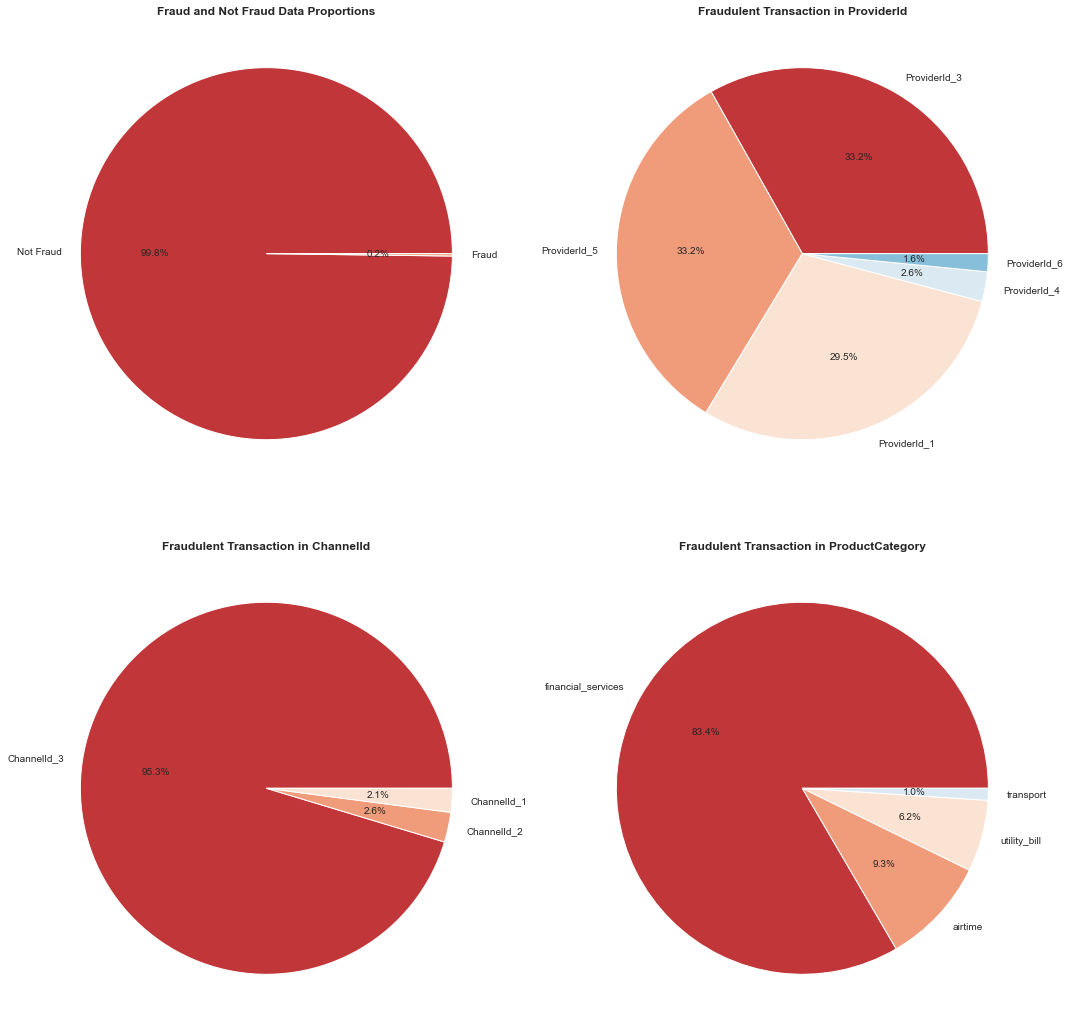

In [49]:
sns.set_style('darkgrid')
sns.set_palette('RdBu')

plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.pie(
    df.FraudResult.value_counts().values,
    labels = ['Not Fraud', 'Fraud'],
    autopct='%1.1f%%'
)
plt.title('Fraud and Not Fraud Data Proportions', fontweight='bold')

plt.subplot(2, 2, 2)
plt.pie(
    x = df_account_sorted[df_account_sorted.FraudResult == 1].ProviderId.value_counts().values, 
    labels = df_account_sorted[df_account_sorted.FraudResult == 1].ProviderId.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Fraudulent Transaction in ProviderId', fontweight='bold')

plt.subplot(2, 2, 3)
plt.pie(
    x = df_account_sorted[df_account_sorted.FraudResult == 1].ChannelId.value_counts().values, 
    labels = df_account_sorted[df_account_sorted.FraudResult == 1].ChannelId.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Fraudulent Transaction in ChannelId', fontweight='bold')

plt.subplot(2, 2, 4)
plt.pie(
    x = df_account_sorted[df_account_sorted.FraudResult == 1].ProductCategory.value_counts().values, 
    labels = df_account_sorted[df_account_sorted.FraudResult == 1].ProductCategory.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Fraudulent Transaction in ProductCategory', fontweight='bold')

plt.tight_layout()
plt.show()

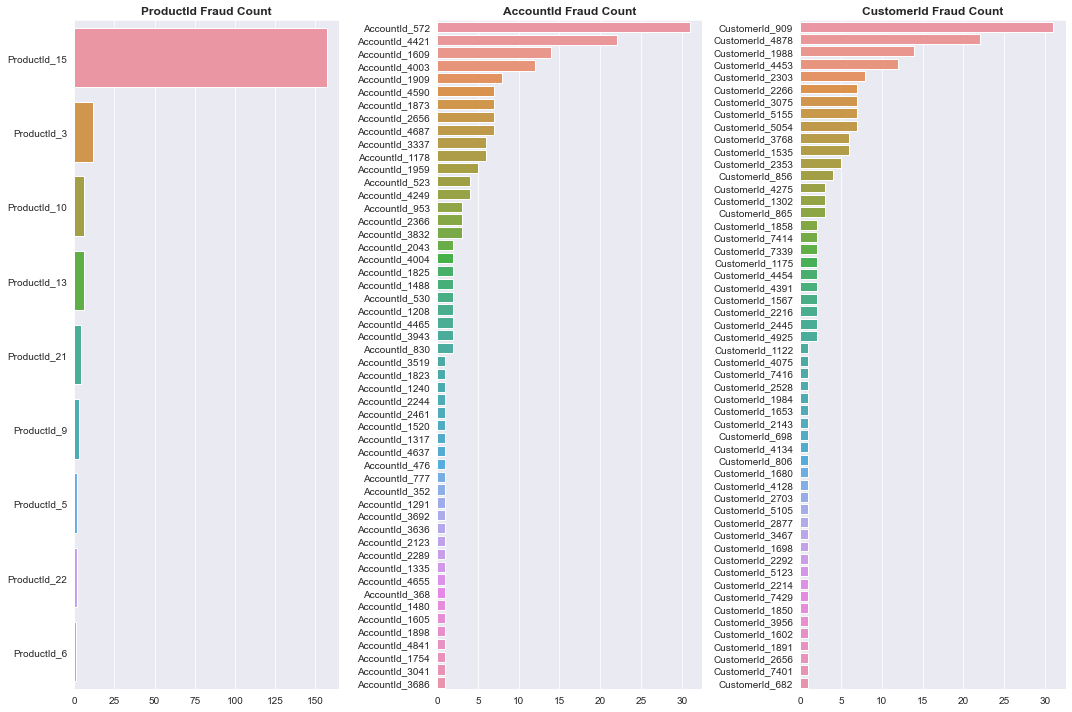

In [50]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
sns.barplot(
    y = df_account_sorted[df_account_sorted.FraudResult == 1].ProductId.value_counts().index,
    x = df_account_sorted[df_account_sorted.FraudResult == 1].ProductId.value_counts().values,
)
plt.title('ProductId Fraud Count', fontweight='bold')

plt.subplot(1, 3, 2)
sns.barplot(
    y = df_account_sorted[df_account_sorted.FraudResult == 1].AccountId.value_counts().index,
    x = df_account_sorted[df_account_sorted.FraudResult == 1].AccountId.value_counts().values,
)
plt.title('AccountId Fraud Count', fontweight='bold')

plt.subplot(1, 3, 3)
sns.barplot(
    y = df_account_sorted[df_account_sorted.FraudResult == 1].CustomerId.value_counts().index,
    x = df_account_sorted[df_account_sorted.FraudResult == 1].CustomerId.value_counts().values,
)
plt.title('CustomerId Fraud Count', fontweight='bold')

plt.tight_layout()
plt.show()

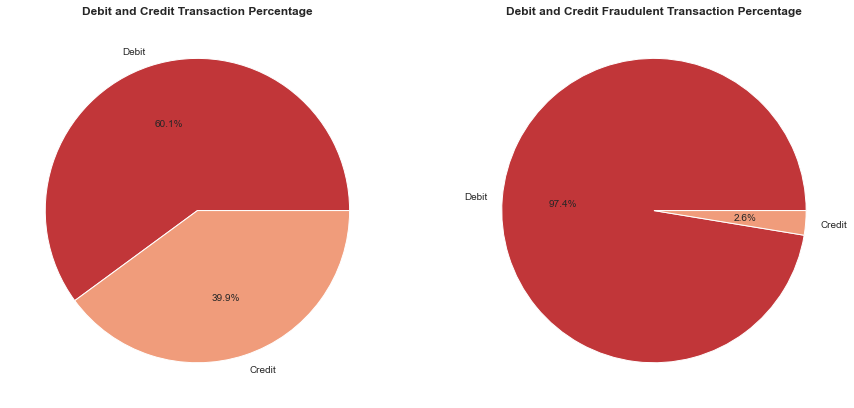

In [51]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 2, 1)
plt.pie(
    x=df_account_sorted.Debit.value_counts().values,
    labels=['Debit', 'Credit'],
    autopct='%1.1f%%'
)
plt.title('Debit and Credit Transaction Percentage', fontweight='bold')

plt.subplot(1, 2, 2)
plt.pie(
    x=df_account_sorted[df_account_sorted.FraudResult == 1].Debit.value_counts().values,
    labels=['Debit', 'Credit'],
    autopct='%1.1f%%'
)
plt.title('Debit and Credit Fraudulent Transaction Percentage', fontweight='bold')

plt.show()

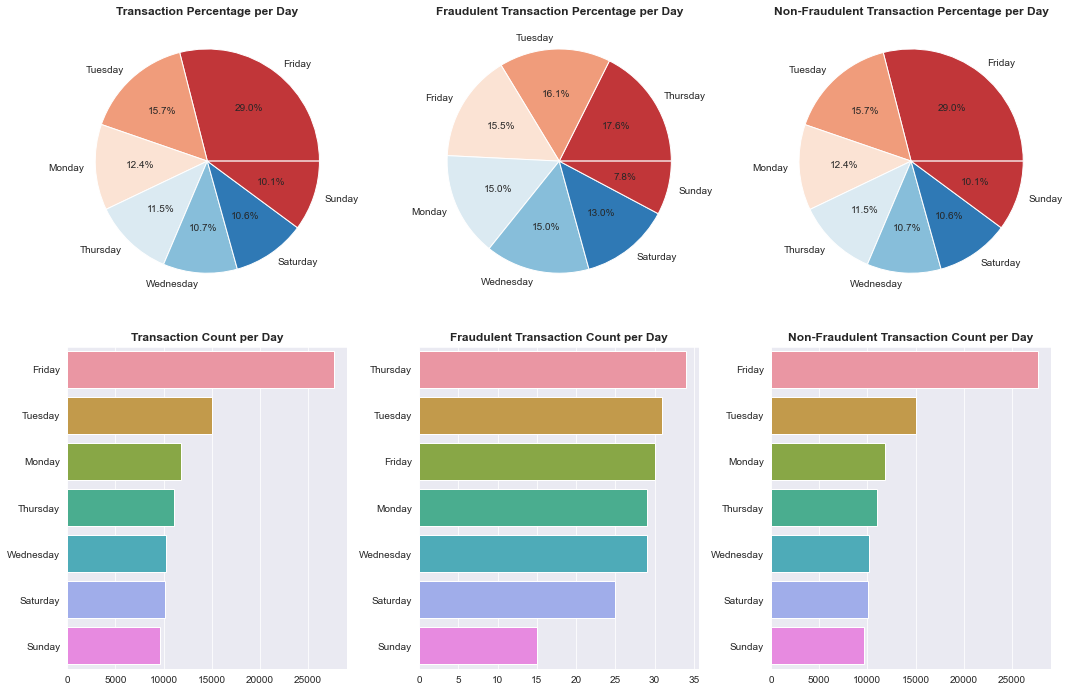

In [52]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.pie(
    df_account_sorted.DayName.value_counts().values,
    labels = df_account_sorted.DayName.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Transaction Percentage per Day', fontweight='bold')

plt.subplot(2, 3, 2)
plt.pie(
    x = df_account_sorted[df_account_sorted.FraudResult == 1].DayName.value_counts().values, 
    labels = df_account_sorted[df_account_sorted.FraudResult == 1].DayName.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Fraudulent Transaction Percentage per Day', fontweight='bold')

plt.subplot(2, 3, 3)
plt.pie(
    x = df_account_sorted[df_account_sorted.FraudResult == 0].DayName.value_counts().values, 
    labels = df_account_sorted[df_account_sorted.FraudResult == 0].DayName.value_counts().index,
    autopct='%1.1f%%'
)
plt.title('Non-Fraudulent Transaction Percentage per Day', fontweight='bold')

plt.subplot(2, 3, 4)
sns.barplot(
    y = df_account_sorted.DayName.value_counts().index,
    x = df_account_sorted.DayName.value_counts().values
)
plt.title('Transaction Count per Day', fontweight='bold')

plt.subplot(2, 3, 5)
sns.barplot(
    y = df_account_sorted[df_account_sorted.FraudResult == 1].DayName.value_counts().index,
    x = df_account_sorted[df_account_sorted.FraudResult == 1].DayName.value_counts().values
)
plt.title('Fraudulent Transaction Count per Day', fontweight='bold')

plt.subplot(2, 3, 6)
sns.barplot(
    y = df_account_sorted[df_account_sorted.FraudResult == 0].DayName.value_counts().index,
    x = df_account_sorted[df_account_sorted.FraudResult == 0].DayName.value_counts().values
)
plt.title('Non-Fraudulent Transaction Count per Day', fontweight='bold')

plt.tight_layout()
plt.show()

In [53]:
df_account_sorted[df_account_sorted.FraudResult == 1].Year.value_counts()

2019    117
2018     76
Name: Year, dtype: int64

In [54]:
df_account_sorted.Year.value_counts()

2018    48107
2019    47555
Name: Year, dtype: int64

In [55]:
# seems like frudulent transaction occured more frequently in several hour like 12, 13, and 16 o'clock
df_account_sorted[df_account_sorted.FraudResult == 1].Hour.value_counts().sort_index()

0      1
3      7
5      6
6      7
7      9
8      8
9     10
10     4
11     9
12    24
13    17
14     8
15     8
16    18
17    12
18    13
19     4
20     9
21    15
22     4
Name: Hour, dtype: int64

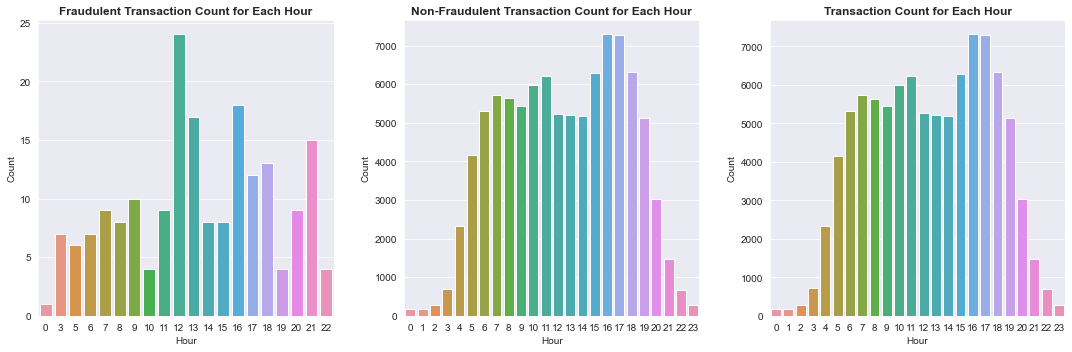

In [56]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(
    x=df_account_sorted[df_account_sorted.FraudResult == 1].Hour.value_counts().sort_index().index,
    y=df_account_sorted[df_account_sorted.FraudResult == 1].Hour.value_counts().sort_index().values
)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Fraudulent Transaction Count for Each Hour', fontweight='bold')

plt.subplot(1, 3, 2)
sns.barplot(
    x=df_account_sorted[df_account_sorted.FraudResult == 0].Hour.value_counts().sort_index().index,
    y=df_account_sorted[df_account_sorted.FraudResult == 0].Hour.value_counts().sort_index().values
)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Non-Fraudulent Transaction Count for Each Hour', fontweight='bold')

plt.subplot(1, 3, 3)
sns.barplot(
    x=df_account_sorted.Hour.value_counts().sort_index().index,
    y=df_account_sorted.Hour.value_counts().sort_index().values
)

plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Transaction Count for Each Hour', fontweight='bold')

plt.tight_layout()
plt.show()

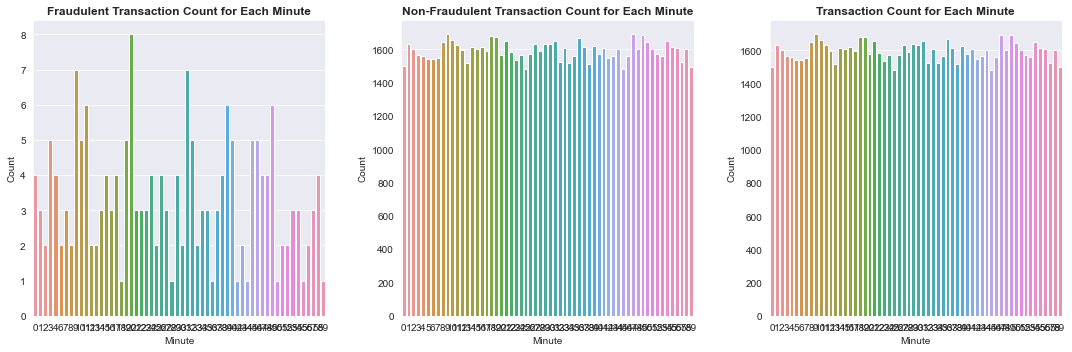

In [57]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(
    x=df_account_sorted[df_account_sorted.FraudResult == 1].Minute.value_counts().sort_index().index,
    y=df_account_sorted[df_account_sorted.FraudResult == 1].Minute.value_counts().sort_index().values
)

plt.xlabel('Minute')
plt.ylabel('Count')
plt.title('Fraudulent Transaction Count for Each Minute', fontweight='bold')

plt.subplot(1, 3, 2)
sns.barplot(
    x=df_account_sorted[df_account_sorted.FraudResult == 0].Minute.value_counts().sort_index().index,
    y=df_account_sorted[df_account_sorted.FraudResult == 0].Minute.value_counts().sort_index().values
)

plt.xlabel('Minute')
plt.ylabel('Count')
plt.title('Non-Fraudulent Transaction Count for Each Minute', fontweight='bold')

plt.subplot(1, 3, 3)
sns.barplot(
    x=df_account_sorted.Minute.value_counts().sort_index().index,
    y=df_account_sorted.Minute.value_counts().sort_index().values
)

plt.xlabel('Minute')
plt.ylabel('Count')
plt.title('Transaction Count for Each Minute', fontweight='bold')

plt.tight_layout()
plt.show()

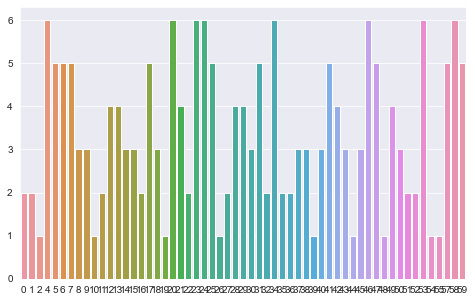

In [58]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x=df_account_sorted[df_account_sorted.FraudResult == 1].Second.value_counts().sort_index().index,
    y=df_account_sorted[df_account_sorted.FraudResult == 1].Second.value_counts().sort_index().values
)

plt.show()

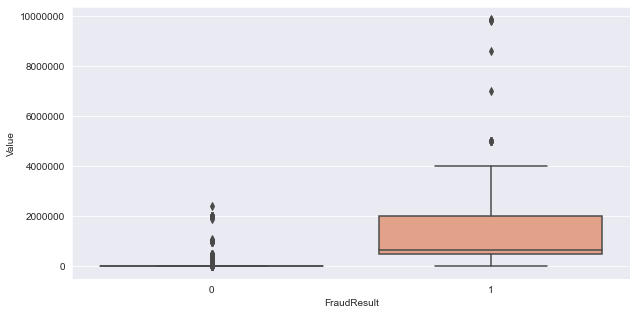

In [59]:
plt.figure(figsize=(10, 5))

sns.boxplot(y='Value', x='FraudResult', data=df_account_sorted)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

In [60]:
df_account_sorted[df_account_sorted.FraudResult == 1].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000,193.00000
mean,1535272.38860,1561819.53886,1.70466,1.00000,0.97409,0.76166,27.17098,2018.60622,5.53368,14.18135,13.34197,28.13472,29.67358,2.77720,11.95855
std,2100525.20747,2081227.29783,0.96330,0.00000,0.15927,4.19141,19.45633,0.48986,5.09699,9.27661,5.07313,16.75661,17.15621,5.84586,15.69429
min,-900000.00000,500.00000,0.00000,1.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,500000.00000,500000.00000,2.00000,1.00000,1.00000,0.00000,8.00000,2018.00000,1.00000,6.00000,10.00000,14.00000,15.00000,0.00000,0.00000
50%,600000.00000,650000.00000,2.00000,1.00000,1.00000,0.00000,27.00000,2019.00000,2.00000,12.00000,13.00000,27.00000,29.00000,0.00000,3.00000
75%,2000000.00000,2000000.00000,2.00000,1.00000,1.00000,0.00000,46.00000,2019.00000,12.00000,22.00000,17.00000,43.00000,45.00000,1.00000,20.00000
max,9880000.00000,9880000.00000,4.00000,1.00000,1.00000,43.00000,59.00000,2019.00000,12.00000,31.00000,22.00000,59.00000,59.00000,22.00000,55.00000


In [61]:
df_account_sorted[df_account_sorted.FraudResult == 0].describe()

,Amount,Value,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
count,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000,95469.00000
mean,3627.72266,6763.22670,2.25709,0.00000,0.60004,0.61480,25.96004,2018.49689,6.56832,15.90638,12.44591,29.48630,29.54902,2.64583,11.95440
std,40357.10782,39994.83538,0.73197,0.00000,0.48989,3.10648,18.28287,0.49999,5.22438,8.96189,4.84636,17.29072,17.31224,5.77409,16.46714
min,-1000000.00000,2.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2018.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,-50.00000,250.00000,2.00000,0.00000,0.00000,0.00000,9.00000,2018.00000,1.00000,8.00000,8.00000,15.00000,15.00000,0.00000,1.00000
50%,1000.00000,1000.00000,2.00000,0.00000,1.00000,0.00000,25.00000,2018.00000,11.00000,16.00000,13.00000,29.00000,29.00000,0.00000,3.00000
75%,2500.00000,5000.00000,2.00000,0.00000,1.00000,0.00000,42.00000,2019.00000,12.00000,24.00000,17.00000,45.00000,45.00000,1.00000,18.00000
max,2400000.00000,2400000.00000,4.00000,0.00000,1.00000,79.00000,59.00000,2019.00000,12.00000,31.00000,23.00000,59.00000,59.00000,23.00000,59.00000


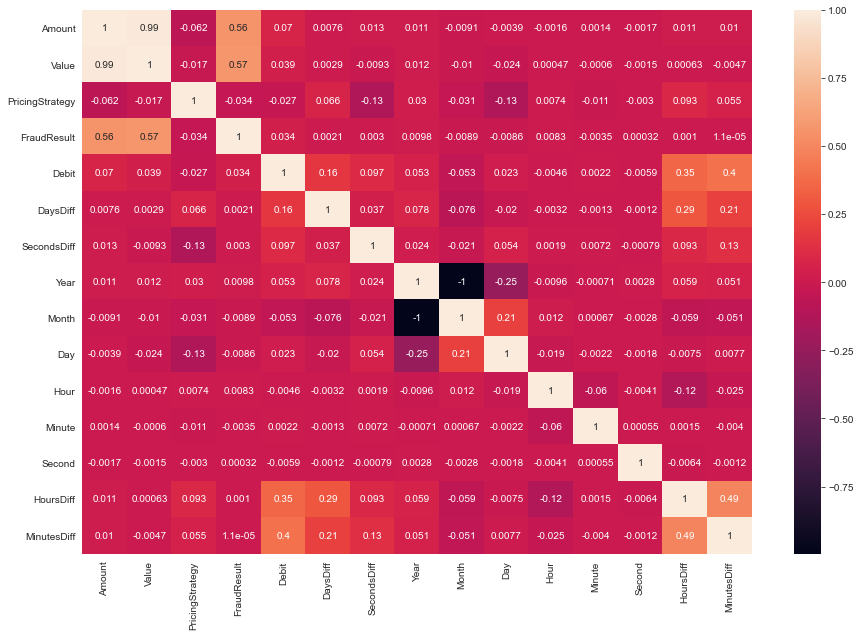

In [62]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_account_sorted.corr(), annot=True)
plt.show()

## Modelling

In [64]:
from sklearn.model_selection import cross_validate, train_test_split, cross_val_score
from sklearn.metrics import classification_report, f1_score, recall_score, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler

C:\Users\Vicqy\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
df_account_sorted

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Debit,DaysDiff,SecondsDiff,DayName,Year,Month,Day,Hour,Minute,Second,HoursDiff,MinutesDiff
0,TransactionId_532,BatchId_1117,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,30000.00000,30000,2019-01-09 15:39:57,2,0,1,0,0,Wednesday,2019,1,9,15,39,57,0,0
1,TransactionId_58617,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:24:53,2,0,1,0,56,Wednesday,2019,1,9,19,24,53,3,44
2,TransactionId_98020,BatchId_19521,AccountId_1,SubscriptionId_3960,CustomerId_46,ProviderId_3,ProductId_15,financial_services,ChannelId_3,20000.00000,20000,2019-01-09 19:25:12,2,0,1,0,19,Wednesday,2019,1,9,19,25,12,0,0
3,TransactionId_20966,BatchId_26095,AccountId_10,SubscriptionId_4346,CustomerId_1093,ProviderId_4,ProductId_1,airtime,ChannelId_5,-2000.00000,2000,2018-11-15 18:00:39,4,0,0,0,0,Thursday,2018,11,15,18,0,39,0,0
4,TransactionId_106422,BatchId_38522,AccountId_10,SubscriptionId_4346,CustomerId_4552,ProviderId_4,ProductId_3,airtime,ChannelId_5,-10000.00000,10000,2018-11-15 18:32:11,4,0,0,0,32,Thursday,2018,11,15,18,32,11,0,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95657,TransactionId_99694,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:03:37,1,0,1,0,1,Saturday,2018,12,22,6,3,37,0,2
95658,TransactionId_105745,BatchId_96892,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:04:18,1,0,1,0,41,Saturday,2018,12,22,6,4,18,0,0
95659,TransactionId_6566,BatchId_28301,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_3,airtime,ChannelId_3,1000.00000,1000,2018-12-22 06:06:14,1,0,1,0,56,Saturday,2018,12,22,6,6,14,0,1
95660,TransactionId_58894,BatchId_99925,AccountId_998,SubscriptionId_247,CustomerId_1349,ProviderId_3,ProductId_15,financial_services,ChannelId_3,2000.00000,2000,2018-12-22 06:07:46,2,0,1,0,32,Saturday,2018,12,22,6,7,46,0,1


In [66]:
# try to build a model using all of the feature
X = df_account_sorted.drop(['FraudResult', 'TransactionId', 'BatchId', 'SubscriptionId',
                            'Amount', 'TransactionStartTime', 'AccountId', 'CustomerId',
                            'ProductId', 'PricingStrategy'], axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df_account_sorted.FraudResult

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

In [101]:
xgb_1 = XGBClassifier(
    n_jobs=-1,
    random_state=101,
    scale_pos_weight=495,
    min_child_weight=2,
    max_depth=5,
    learning_rate=0.1,
    n_estimators=400,
    reg_lambda=3,
    colsample_bytree=0.8,
    subsample=1,
)

xgb_1_cv = cross_val_score(xgb_1, X_train, y_train, scoring='f1', cv=5, n_jobs=-1)

print('XGB 1 f1-score CV :')
print(xgb_1_cv)
print('\nXGB 1 f1-score CV STD & Mean :')
print(np.std(xgb_1_cv), np.mean(xgb_1_cv))

XGB 1 f1-score CV :
[0.91176471 0.8852459  0.9375     0.91803279 0.87878788]

XGB 1 f1-score CV STD & Mean :
0.021638611212824472 0.9062662546389644


In [87]:
xgb_1.get_params()

{'objective': 'binary:logistic',
 'base_score': 0.5,
 'booster': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': 0.3,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 2,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'random_state': 101,
 'reg_alpha': 0,
 'reg_lambda': 3,
 'scale_pos_weight': 495,
 'subsample': 1,
 'tree_method': None,
 'validate_parameters': False,
 'verbosity': None}

In [102]:
xgb_1.fit(X_train, y_train)

print('Test Classification Report')
print(classification_report(y_test, xgb_1.predict(X_test)))

print('Train Classification Report')
print(classification_report(y_train, xgb_1.predict(X_train)))

Test Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.88      0.97      0.93        39

    accuracy                           1.00     19133
   macro avg       0.94      0.99      0.96     19133
weighted avg       1.00      1.00      1.00     19133

Train Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     76375
           1       0.99      1.00      1.00       154

    accuracy                           1.00     76529
   macro avg       1.00      1.00      1.00     76529
weighted avg       1.00      1.00      1.00     76529



In [99]:
confusion_matrix(y_test, xgb_1.predict(X_test))

array([[19089,     5],
       [    1,    38]], dtype=int64)

In [100]:
confusion_matrix(y_train, xgb_1.predict(X_train))

array([[76373,     2],
       [    0,   154]], dtype=int64)

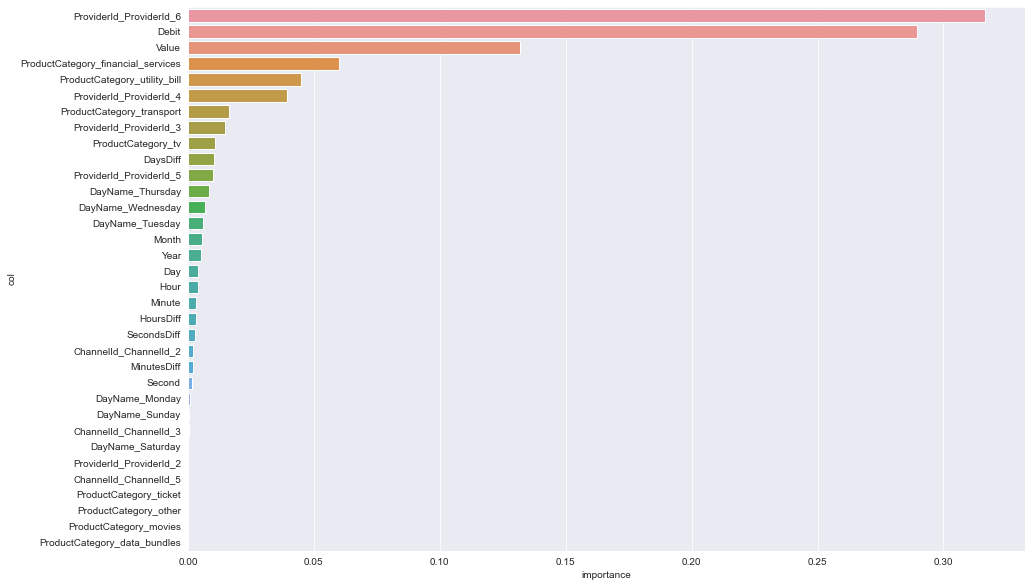

In [103]:
plt.figure(figsize=(15, 10))
sns.barplot(
    y=pd.DataFrame({'col':X.columns, 'importance':xgb_1.feature_importances_}).sort_values(by='importance', ascending=False).col,
    x=pd.DataFrame({'col':X.columns, 'importance':xgb_1.feature_importances_}).sort_values(by='importance', ascending=False).importance
)

plt.show()